# <div style="font-family: Georgia, serif"><div style="text-align: center;color: #E67E02"><div><h1>Assignment 1</h1></div></div><div style="color: #0377DE; font-size: 20px"><span style="padding-right: 100px;">Name: Koushik Mahanta</span > <span>Roll No.: 002011001106</span></div></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import (load_iris, load_breast_cancer, load_diabetes)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import (MultinomialNB, GaussianNB, BernoulliNB)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score)
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.utils import Bunch

In [4]:
def getModelScores(dataset, model_params, k_fold):
    """This function performs k_fold Grid search cross validation on 
    the dataset for all the models in `model_params` using all combinations 
    of configuraions mentioned for that model and returns a DataFrame 
    containing maximum test score configurations for each model"""
    scores = []
    for model_name, mp in model_params.items():
        clf =  GridSearchCV(mp['model'], mp['params'], 
                            cv=5, 
                            return_train_score=False)
        
        clf.fit(dataset.data, dataset.target)
        
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
        
    df = pd.DataFrame(scores,
                      columns=['model','best_score','best_params'])
    return df

In [5]:
def printClassficationReport(dataset, classifier, isTree, random_state, **args):
    """This function takes a model and its configurations and prints the 
    classification report and confusion matrix, if the classifier is a 
    DecisionTreeClassifier then it displays the tree"""
    
    X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                        dataset.target, 
                                                        test_size=0.3, 
                                                        stratify=dataset.target, 
                                                        random_state=random_state)
    
    trained_model = classifier(**args).fit(X_train, y_train)
    y_prediction = trained_model.predict(X_test)
    
    print("------------------------- Classification Report ----------------------")
    print(classification_report(y_test, 
                                y_prediction,  
                                labels=np.unique(y_prediction)))
    
    print("---------------------------- Confusion Mtrix -------------------------")
    cf_matrix = confusion_matrix(y_test, y_prediction)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), 
                annot=True, fmt='.2%', cmap='Blues')
    plt.show()

    if isTree:
        #Plotting the tree
        plt.figure(figsize=(15, 10))
        tree.plot_tree(decision_tree=trained_model, 
                       filled=True, 
                       feature_names=dataset.feature_names,
                       class_names=dataset.target_names)
        plt.show()

## Iris Dataset

In [6]:
iris_model_params = {
    'multinomial_nb': {
        'model': MultinomialNB(),
        'params' : {}  
    },
    'gaussian_nb': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-5]
        }
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best'],
            'max_depth': [3, 4, 5]
            
        }
    }
}

In [7]:
iris_dataset = load_iris()
getModelScores(iris_dataset, iris_model_params, 5)

,model,best_score,best_params
0,multinomial_nb,0.953333,{}
1,gaussian_nb,0.953333,{'var_smoothing': 0.01}
2,decision_tree,0.966667,"{'criterion': 'gini', 'max_depth': 4, 'splitte..."


__As we can see the DecisionTreeClassifier gives the best test_score with following configuraion : 
'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'__

------------------------- Classification Report ----------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

---------------------------- Confusion Mtrix -------------------------


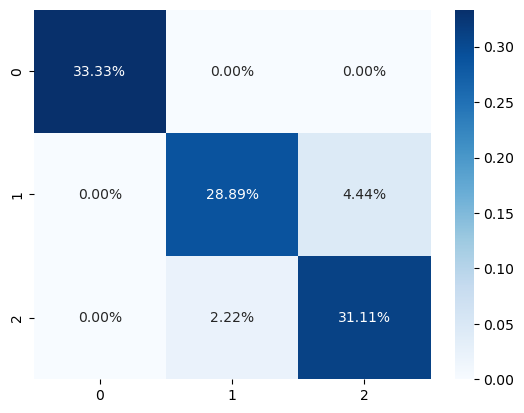

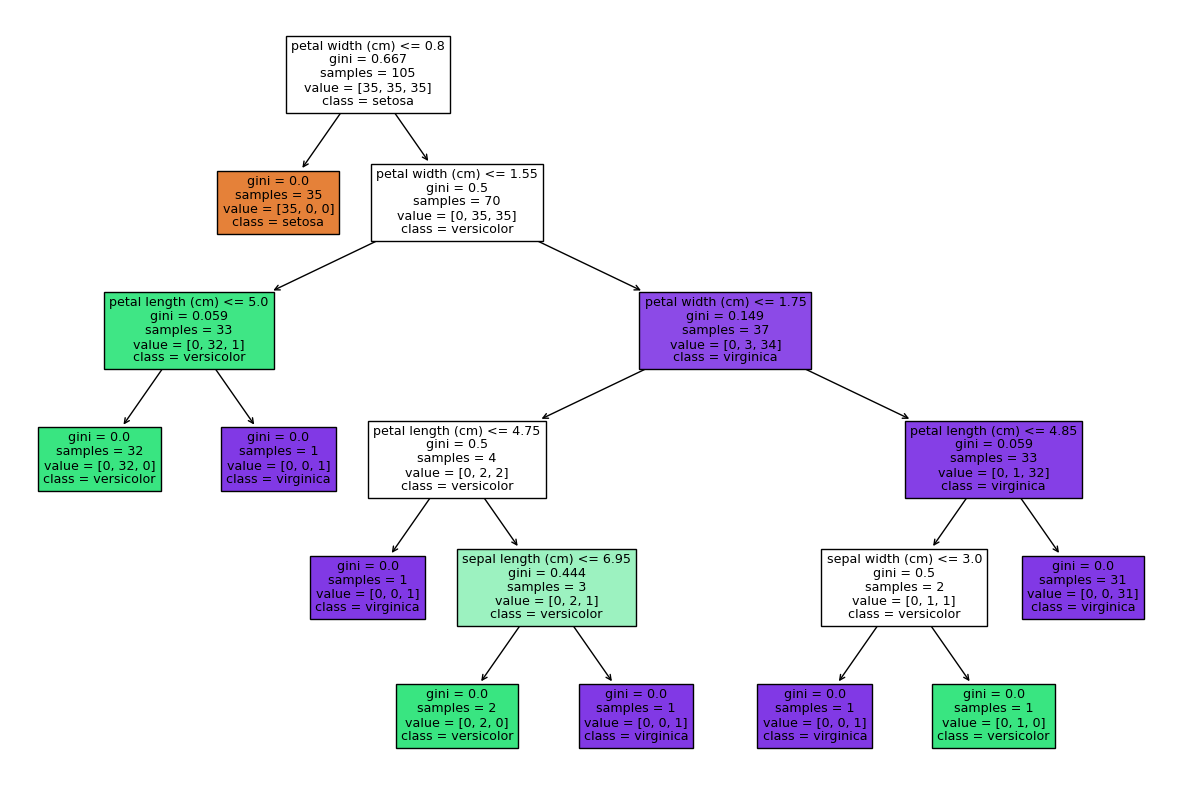

In [8]:
printClassficationReport(iris_dataset, 
                         DecisionTreeClassifier, 
                         True, 
                         40, 
                         max_depth=5)

## Wisconsin Breast Cancer Dataset

In [9]:
breast_cancer_model_params = {
    'multinomial_nb': {
        'model': MultinomialNB(),
        'params' : {
            'fit_prior': [True, False],
            'class_prior': [None,
                            [0.9, 0.1], [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], 
                            [0.5, 0.5], [0.4, 0.6], [0.3, 0.7]]
        }  
    },
    'gaussian_nb': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-5],
            'priors': [None, 
                       [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], 
                       [0.5, 0.5], [0.4, 0.6], [0.3, 0.7]]
        }
    },
    'bernoulli_nb': {
        'model': BernoulliNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [3, 4, 5]
        }
    }
}

In [10]:
breast_cancer_dataset = load_breast_cancer()
getModelScores(breast_cancer_dataset, 
               breast_cancer_model_params, 
               5)

,model,best_score,best_params
0,multinomial_nb,0.898075,"{'class_prior': [0.8, 0.2], 'fit_prior': True}"
1,gaussian_nb,0.922714,"{'priors': None, 'var_smoothing': 1e-05}"
2,bernoulli_nb,0.627418,{}
3,decision_tree,0.945521,"{'criterion': 'log_loss', 'max_depth': 5, 'spl..."


__As we can see the DecisionTreeClassifier gives the best test_score with following configuraion : 'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'__

------------------------- Classification Report ----------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

---------------------------- Confusion Mtrix -------------------------


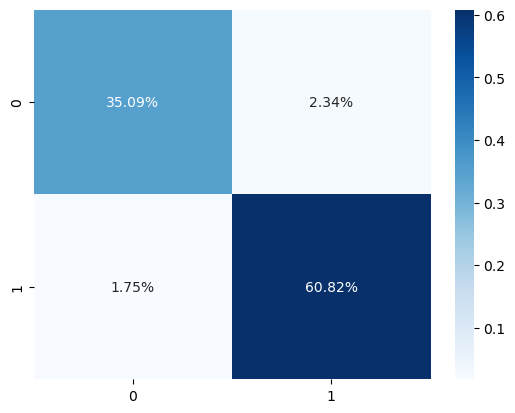

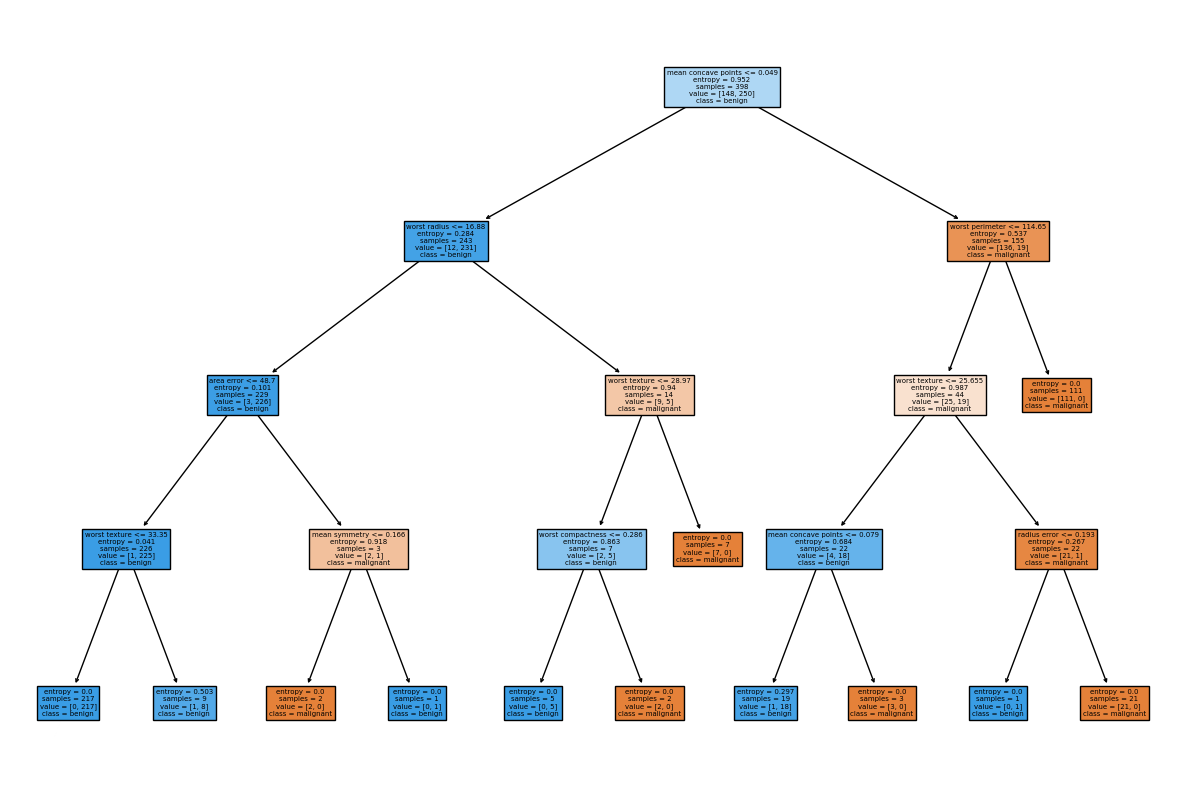

In [11]:
printClassficationReport(breast_cancer_dataset, 
                         DecisionTreeClassifier, 
                         True, 
                         40, 
                         criterion='entropy', 
                         max_depth=4)

## Diabetes Dataset

In [12]:
diabetes_model_params = {
    'multinomial_nb': {
        'model': MultinomialNB(),
         'params' : {
            'fit_prior': [True, False],
            'class_prior': [None,
                            [0.9, 0.1], [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], 
                            [0.5, 0.5], [0.4, 0.6], [0.3, 0.7]]
        }
    },
    'gaussian_nb': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-5],
            'priors': [None, 
                       [0.8, 0.2], [0.7, 0.3], [0.6, 0.4], 
                       [0.5, 0.5], [0.4, 0.6], [0.3, 0.7]]
        }
    },
    'bernoulli_nb': {
        'model': BernoulliNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model': DecisionTreeClassifier(min_samples_leaf=2),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [3, 4, 5, 6]
        }
    }
}

In [13]:
# downloading the Diabetes dataset
!curl https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv -o data/diabetes.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23873  100 23873    0     0   479k      0 --:--:-- --:--:-- --:--:--  518k


In [14]:
# Preparing data
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_dataset = Bunch( data=diabetes_df.drop('Outcome', axis='columns'), 
                          target=diabetes_df['Outcome'])

In [15]:
getModelScores(diabetes_dataset, diabetes_model_params, 5)

,model,best_score,best_params
0,multinomial_nb,0.615839,"{'class_prior': [0.9, 0.1], 'fit_prior': True}"
1,gaussian_nb,0.756540,"{'priors': [0.8, 0.2], 'var_smoothing': 0.0001}"
2,bernoulli_nb,0.647144,{}
3,decision_tree,0.744860,"{'criterion': 'gini', 'max_depth': 5, 'splitte..."


__As we can see the Gaussian Naive Bayes gives the best test_score with following configuraion : 'priors': [0.8, 0.2], 'var_smoothing': 0.0001__

------------------------- Classification Report ----------------------
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       150
           1       0.70      0.47      0.56        81

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.69       231
weighted avg       0.74      0.74      0.73       231

---------------------------- Confusion Mtrix -------------------------


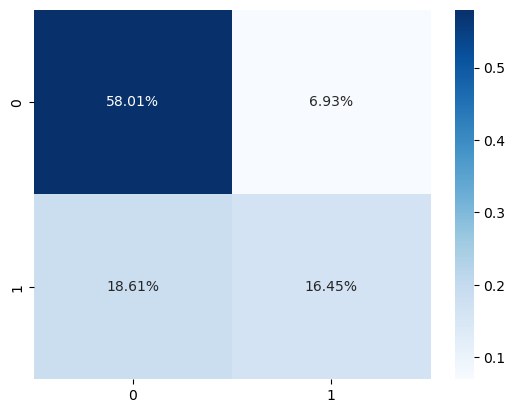

In [16]:
printClassficationReport(diabetes_dataset, 
                         GaussianNB, 
                         False, 
                         30, 
                         priors=[0.8, 0.2], 
                         var_smoothing=0.0001)